In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data',index_col=False)

<pre>R (Recency - months since last donation), 
F (Frequency - total number of donation), 
M (Monetary - total blood donated in c.c.), 
T (Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood). </pre>

In [3]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
df.columns = ['Recency','Frequency','Monetary','Time','Donated']

*** Exploratory Data Analysis(EDA) ***

In [5]:
#Each Attibute of given dataset is continuous integer value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency      748 non-null int64
Frequency    748 non-null int64
Monetary     748 non-null int64
Time         748 non-null int64
Donated      748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
df.describe()

,Recency,Frequency,Monetary,Time,Donated
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


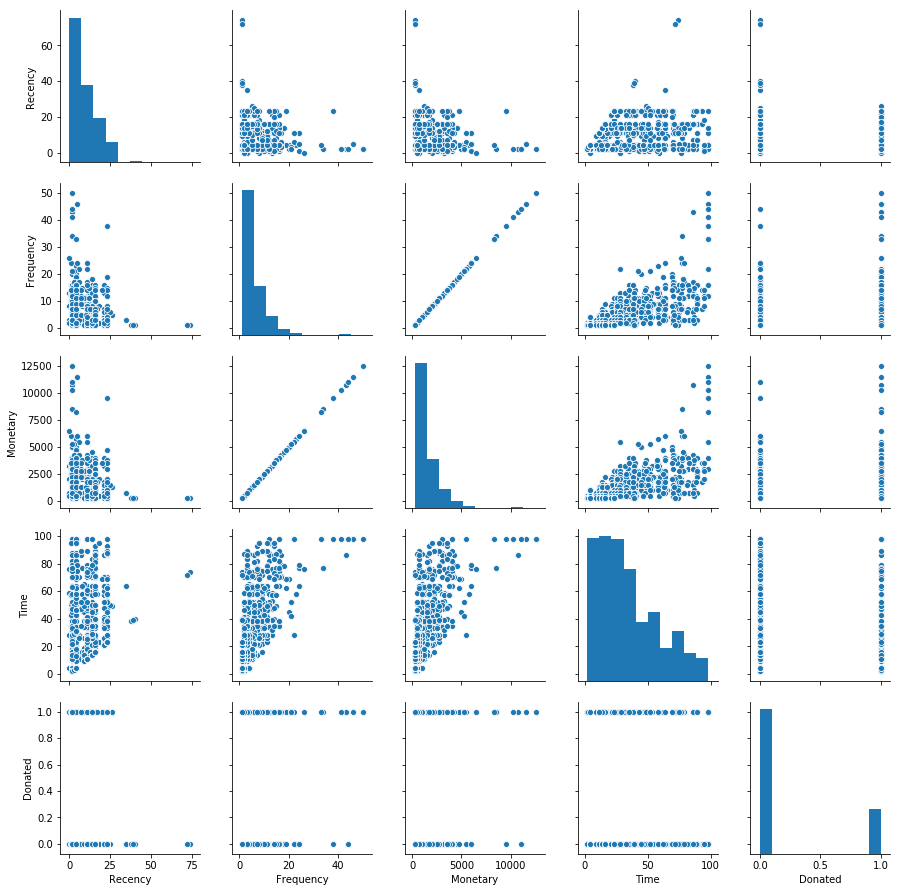

In [7]:
#Pairplot shows Frequency and Monetary are highly corelated 
sns.pairplot(df)

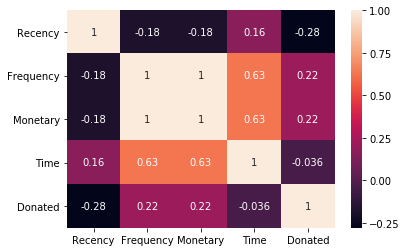

In [8]:
#Frequency and Monetary are perfectly corelated
#corelation between Frequency and Monetary shows that the blood doner donates more blood each time than previously donated
sns.heatmap(df.corr(),annot=True)

In [9]:
df.drop(['Monetary'],axis=1,inplace=True)

In [10]:
df.head()

,Recency,Frequency,Time,Donated
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0


In [ ]:
#normalized dataframe
#ndf = (df - df.min())/(df.max()-df.min())

In [11]:
def test_train_split(dataset, test_size = 0.5):
    train_size = 1-test_size
    #Separation of values for statified dataset
    truedf = dataset[dataset.iloc[:,-1] == True]
    falsedf = dataset[dataset.iloc[:,-1] == False]
    
    #contatinating 75% of true and flase data for train set and remaining for test set
    train_set = pd.concat([truedf[0:int(truedf.count()[0]*train_size)],falsedf[0:int(falsedf.count()[0]*train_size)]])
    test_set = pd.concat([truedf[int(truedf.count()[0]*train_size):],falsedf[int(falsedf.count()[0]*train_size):]])
    
    #X_train = train.drop(train.columns[-1], axis=1)
    #y_train = train.drop(train.columns[:len(df.columns)-1], axis=1)
    #X_test = test.drop(test.columns[-1], axis=1)
    #y_test = test.drop(test.columns[:len(df.columns)-1], axis=1)
    #return X_train,y_train,X_test,y_test
    
    return train_set,test_set

train,test = test_train_split(df)

In [12]:
train_true_mean = train[train.iloc[:,-1] == True].mean().values[0:-1]
train_true_var = train[train.iloc[:,-1] == True].var().values[0:-1]
train_false_mean = train[train.iloc[:,-1] == False].mean().values[0:-1]
train_false_var = train[train.iloc[:,-1] == False].var().values[0:-1]

In [13]:
p_true = (df[df.iloc[:,-1] == True].count()/df.count())[0]
p_false = 1 - p_true

***Setting***
**<pre>
ynew = argmax<sub>y∈Y</sub> p(y|a1, a2, · · · , ad)
ynew = argmax<sub>y∈Y</sub> p(a1, a2, · · · , ad|y) ∗ p(y)
ynew = argmax<sub>y∈Y</sub> p(y) * product(p(aj|y),for all j)
</pre>**

In [ ]:
#np.dot(np.dot((train[:,0]-train_true_mean[0]).T,train_true_std[0]),(train[:,0]-train_true_mean[0]))

In [14]:
def probability(x,mean,var):
    p = 1/(np.sqrt(2*np.pi*var)) * np.exp((-(x-mean)**2)/(2*var))
    return np.prod(p)

In [15]:
def argmax_probability(data):
    #for true
    y_new_true = probability(data,train_true_mean,train_true_var)* p_true
    
    #for false
    y_new_false = probability(data,train_false_mean,train_false_var)* p_false
    
    if (y_new_true>y_new_false):
        return 1
    else:
        return 0

In [16]:
predictions = []
for index, row in test.iterrows():
    data = row.values[:-1]
    predictions.append(argmax_probability(data))

In [17]:
predicted = np.array(predictions)
actual =  test['Donated'].values

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
print(confusion_matrix(actual,predicted))

[[278   7]
 [ 71  18]]


In [20]:
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       285
           1       0.72      0.20      0.32        89

   micro avg       0.79      0.79      0.79       374
   macro avg       0.76      0.59      0.60       374
weighted avg       0.78      0.79      0.74       374

